<a href="https://colab.research.google.com/github/Sanjeevhegde009/Yes-Bank-closing-price-prediction/blob/main/Yes_Bank_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                      #import numpy module
from numpy import math
import pandas as pd                     #import pandas module
import matplotlib.pyplot as plt         #import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error)

In [2]:
from google.colab import drive    #importing google drive

In [3]:
drive.mount('/content/drive')     #mounting google drive

Mounted at /content/drive


In [4]:
data= pd.read_csv('/content/drive/MyDrive/Copy of data_YesBank_StockPrices.csv')    #specifying the file to be analysed using path and file name

In [5]:
data.head()     #checking the top 5 rows of the data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
data.tail()     #checking the last five rows of the data set

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [7]:
data.columns.tolist()    #fetching the list of columns in the data set

['Date', 'Open', 'High', 'Low', 'Close']

# **Column description**
The given data consists of 5 columns. They include:
1. Date: The month against which Open, High, Low and Close prices of Yes Bank stock are plotted.
2. Open: Opening price of the stock on the specified date. In this case, start of the month
3. High: Highest price attained by the Yes Bank stock during the monthly period
4. Low: Lowest price attained by the Yes Bank stock during the monthly period
5. Close: Closing price of the Yes Bank stock at the end of the month



# **Exploratory Data Analysis**

In [8]:
data.info()   #checking the information regarding the given data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


It can be seen that the data set contains 4 numeric values and one object that is the month against which price data is collected. There are a total of 185 entries in the given data set

In [9]:
data.isnull().sum()     #checking for null values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Hence, there are no null values in the data set

In [10]:
data.nunique()    #checking repeated entries of data for same month

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

It can be seen that out of 185 entries for dates, all of them are unique. Hence, the given data set contains unique values only

In [11]:
data.describe()       #obtaining statistical description of the given data and making initial comments

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


From above statistical description of the data set during the period of data collection, we can infer:
1. Highest price recorded by Yes Bank is Rs. 404
2. Lowest price recorded by Yes Bank is Rs. 5.55
3. Mean closing price is Rs. 105 with a standard deviation of Rs. 98.58 indicating violent movements in the stock

In [12]:
data.dtypes       #fetching the data type for each feature

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

It can be noted that Date column is object type data which needs to converted into Date type with format mm-yy

In [13]:
from datetime import datetime       #importing datetime library
ohlc_data= data.copy()              #creating a copy of the original data for performing EDA operations
ohlc_data['Date']= ohlc_data['Date'].apply( lambda x: datetime.strptime(x, '%b-%y'))      #converting string data of date column to datetime format

In [14]:
ohlc_data.info()    #checking for succesful conversion into datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


Hence, it can be seen that appropriate data types are now assigned to the features.

Lets now see the distribution of the target variable i.e., the closing price against various other parameters

Text(0, 0.5, 'Closing price on Rs.')

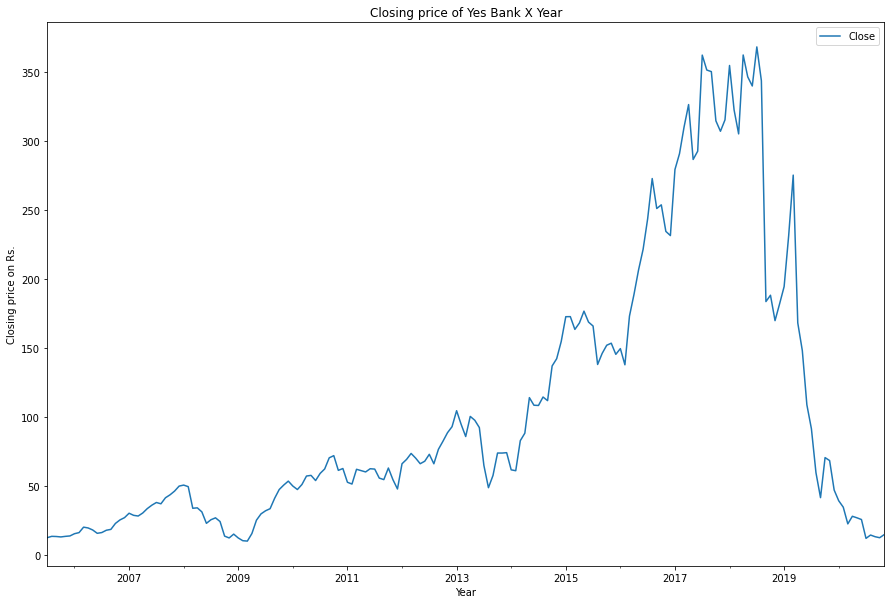

In [15]:
#plotting closing price against date
plt.rcParams['figure.figsize']= (15,10)                               #setting figure size
ohlc_data.plot(kind="line", x="Date", y="Close")                      #plotting linegraph
plt.title("Closing price of Yes Bank X Year")                         #title for the plot
plt.xlabel("Year")                                                    #Xlabel for the plot
plt.ylabel("Closing price on Rs.")                                    #Ylabel for the plot

From the above figure, it is clearly seen that Yes Bank price has been in an uptrend until around mid of 2018. However, after 2018 a massive fall of the stock price is seen due to fraud cases involving the company's then MD and CEO Mr. Rana Kapoor

Text(0.5, 0, 'Closing price in Rs.')

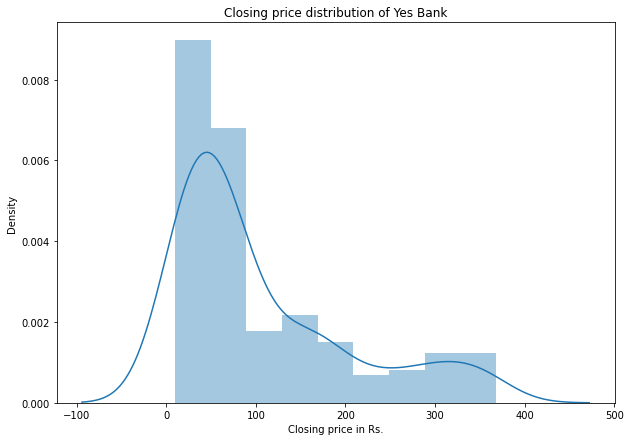

In [16]:
#plotting histogram to check the distribution of the closing price
plt.figure(figsize=(10,7))                                  #setting figure size
sns.distplot(ohlc_data['Close'])                            #plotting histogram with smoothed distribution curve
plt.title("Closing price distribution of Yes Bank")         #title for the plot
plt.xlabel("Closing price in Rs.")                          #xlabel title for the plot

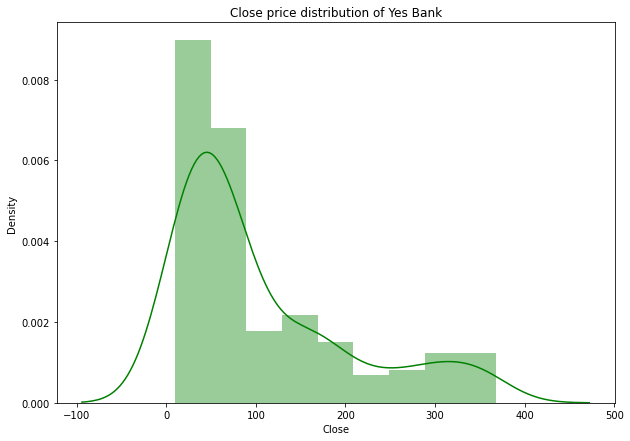

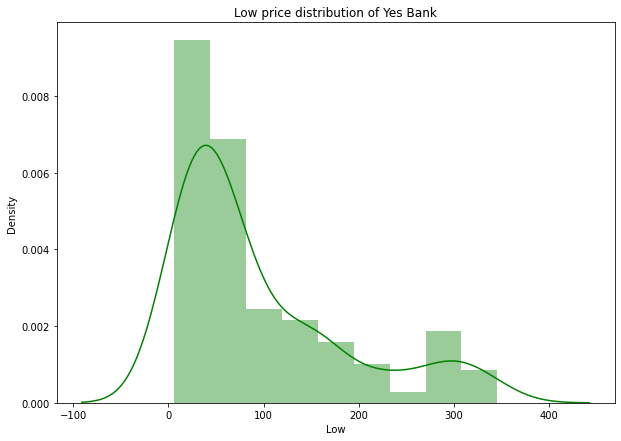

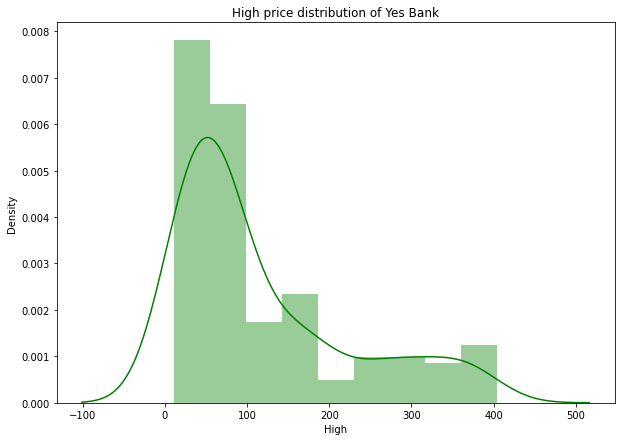

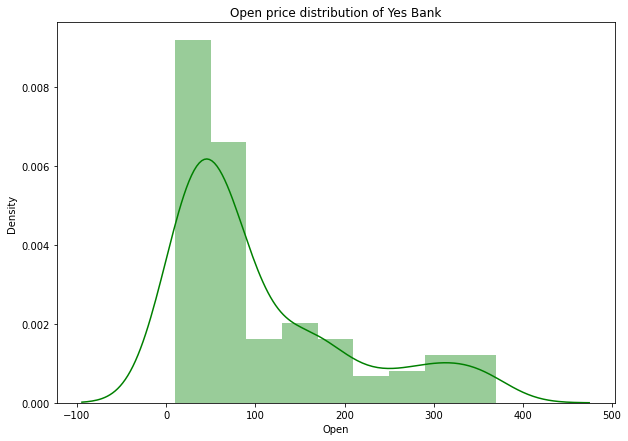

['Close', 'Low', 'High', 'Open']


In [17]:
#checking for skewness by plotting histograms for each feature
numeric_features= list(set(ohlc_data.columns)-{'Date'})            #declaring list of numeric features for plotting graph
for feature in numeric_features:
  fig= plt.figure(figsize=(10,7))
  ax= fig.gca()
  sns.distplot(ohlc_data[feature],kde=True, color="green")
  plt.title(feature+' price distribution of Yes Bank')
plt.show()
print(numeric_features)

Hence, it can be seen that the distribution of features is right skewed

In [18]:
numeric_features

['Close', 'Low', 'High', 'Open']

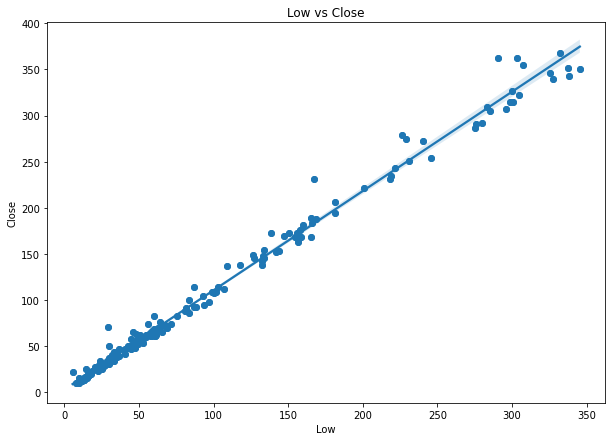

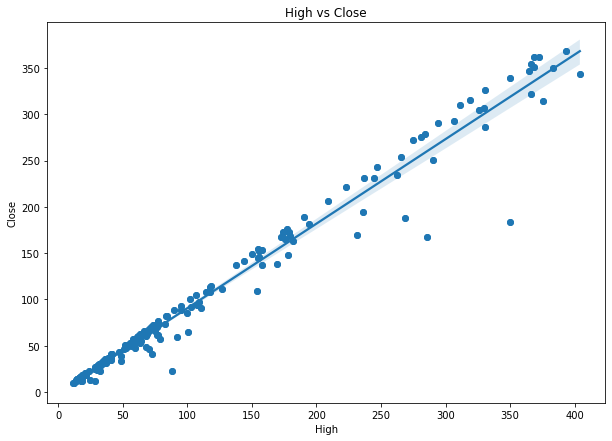

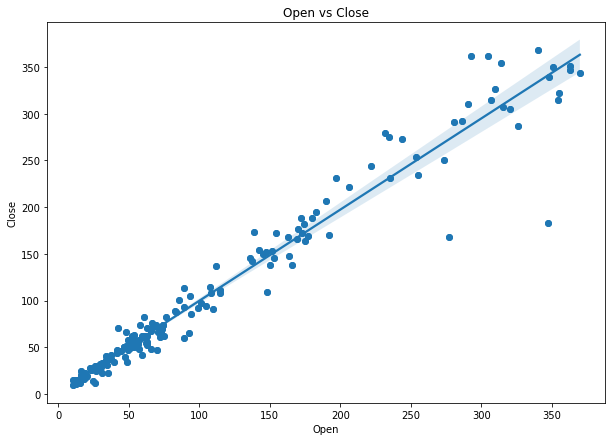

In [19]:
#Checking the relationship between dependent variable i.e., closing price and other independent variables
dependent_features= list(set(numeric_features)-{"Close"})
for feature in dependent_features:
  fig= plt.figure(figsize=(10,7))
  ax=fig.gca()
  plt.scatter(ohlc_data[feature],ohlc_data['Close'])
  plt.title(feature+' vs Close')
  plt.xlabel(feature)
  plt.ylabel('Closing Price')
  sns.regplot(x=feature,y='Close',data=ohlc_data)

Hence, it can be inferred that closing price exhibits linear relationship with the independent features.

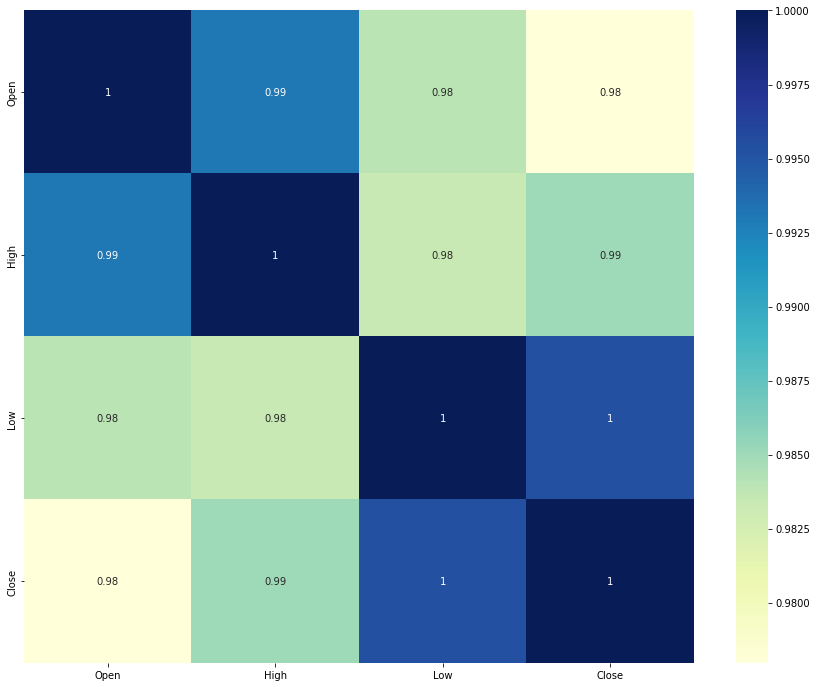

In [20]:
#checking for multicollinearity
plt.figure(figsize=(15,12))
correlation= ohlc_data.corr()
corr= sns.heatmap((correlation), cmap='YlGnBu', annot=True)

**It can be clearly noted that there is a high correlation between all the features.**

Hence, it is necessary to eliminate reduce correlation either by dropping features or establishing another feature which quantifies the variables which are not considered.

# **Feature Engineering**
**We can consider the average value of the features Open, High, Low and Close of the previous day for eliminating potential errors in the model we are building**

In [21]:
#Calculating average of Open, High and Low
ohlc_data['avg_ohlc']= ohlc_data[['Open','High','Low','Close']].mean(axis=1).round(2)

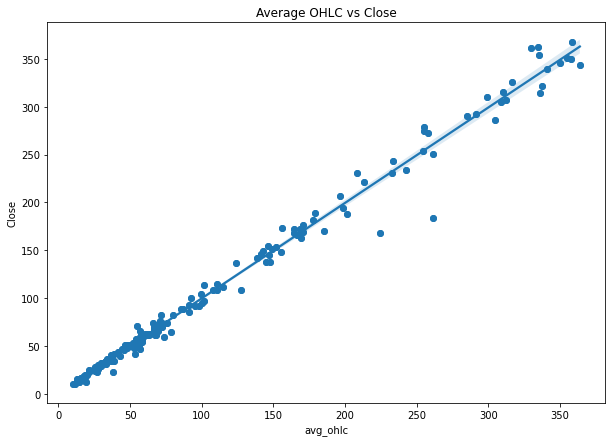

In [22]:
plt.rcParams['figure.figsize']=(10,7)
plt.scatter(x=ohlc_data['avg_ohlc'],y=ohlc_data['Close'])
plt.title("Average OHLC vs Close")
plt.xlabel("Average price of OHL")
plt.ylabel("Closing Price")
sns.regplot(x="avg_ohlc",y="Close", data= ohlc_data)

Hence, it is clear that similar linear relationship exits between the new feature avg_ohlc i.e., average of Open, High, Low and Close of previous day with current session Closing price of the stock

**Also, multicollinearity can be further reduced by considering lag variable of avg_ohlc. By convention, stock markets are analysed with indicators whose lookback period spans to 14 previous data points such as 14-day Exponential Moving Average and 14 period Relative Strength Index(RSI) etc. Hence, 14 data points based lag can be ideally incorporated into the data set wherein, a weighted measure of the average of OHLC for 14 consecutive session can be considered while forming linear regression equation**

In [23]:
#incorporating lags
for i in range(1,15):
  ohlc_data["lag{}".format(i)]= ohlc_data.avg_ohlc.shift(i)

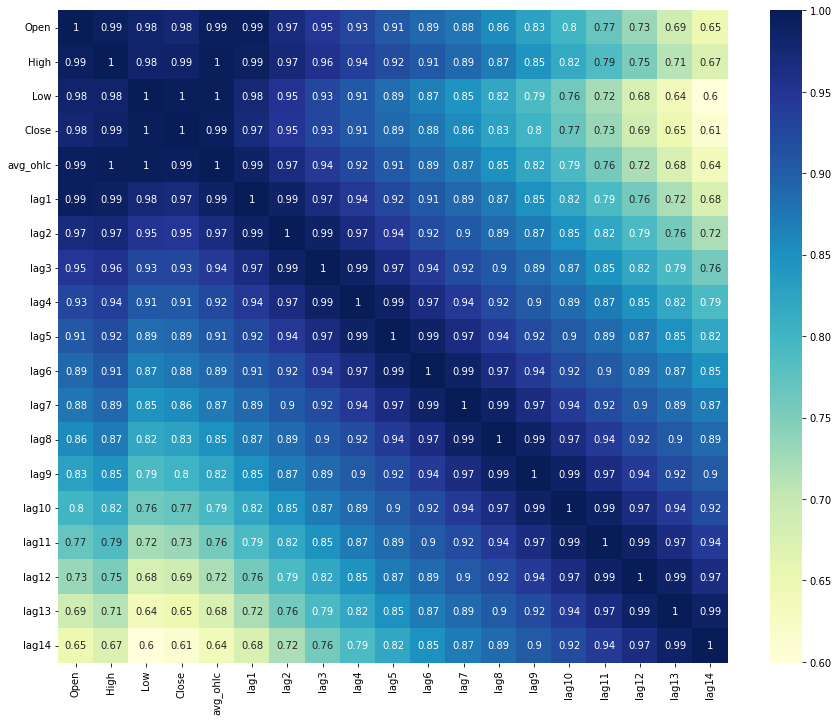

In [24]:
#checking for multicollinearity
plt.figure(figsize=(15,12))
corr= sns.heatmap(ohlc_data.corr(), cmap='YlGnBu', annot=True)


Thus, it is evident that introducing lag has significantly reduced correlation between variables

In [25]:
#We can now drop other columns in the data frame except avg_ohl feature since it represents all other features
ohlc_data.drop(columns=["Open","High","Low"],axis=1, inplace=True)
ohlc_data.set_index(["Date"],inplace=True)

# Splitting and scaling data for training and testing

In [26]:
y= ohlc_data.dropna().Close    #drops any NaN values in the data frame
x= ohlc_data.dropna().drop(["Close"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(x, y, train_size=0.7,random_state=0)
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Fitting Regression Curve 

In [27]:
regressor= LinearRegression()    
regressor.fit(X_train, y_train)     #fitting linear regression model

LinearRegression()

In [28]:
regressor.intercept_    #Fetching the intercept value

114.16890756302514

In [29]:
regressor.coef_       #fetching coefficents

array([ 178.10777207, -127.93881952,   86.40590204,  -60.99883681,
         46.87620053,  -43.92259757,   42.34736091,  -33.91954534,
         17.90710902,  -16.22232275,   42.68755227,  -50.36827933,
         29.83210708,  -15.74823876,    6.19258697])

In [30]:
y_pred_test= regressor.predict(X_test) #predicting value of closing price

In [31]:
y_pred_train= regressor.predict(X_train)    #predicting values for trained data set

# **Testing the Regressrion Fit**

In [32]:
#writing function to determine values of various evaluation metrics
def eval_metrics(y, y_hat):
  '''This function prints various evaluation metrics scores for the provided training and testing data sets'''
  r2= round(r2_score(y, y_hat),4)
  print(f"r2_score is: {r2}")
  mse= round(mean_squared_error(y, y_hat),4)
  print(f"MSE value is: {mse}")
  rmse= round(math.sqrt(mse),4)
  print(f"RMSE value is: {rmse}")
  mae= round(mean_absolute_error(y,y_hat),4)
  print(f"MAE value is: {mae}")
  mape= round(mean_absolute_percentage_error(y, y_hat),4)
  print(f"MAPE value is: {mape}")


In [33]:
#Checking the values of evaluation metrices for training data set
eval_metrics(y_train, y_pred_train)

r2_score is: 0.9983
MSE value is: 18.0613
RMSE value is: 4.2499
MAE value is: 3.1966
MAPE value is: 0.0483


In [34]:
#Checking the values of evaluation metrices for testing data set
eval_metrics(y_test, y_pred_test)

r2_score is: 0.9928
MSE value is: 59.4408
RMSE value is: 7.7098
MAE value is: 5.1616
MAPE value is: 0.0906


**Hence, it is evident that linear regression model built is highly successful in predicting the Yes Bank Closing price for both training and testing data sets**

## **Plotting and Visualization**

In [35]:
#Defining functions to plot and visualize the data fit
def plotter(y,y_hat):
  ''' this function takes values of predictions and actual values(time series based with Date and Closing price as features) of two data sets for a given linear regression model of an equity'''
  df=pd.DataFrame(y)                          #Converts data into DataFrame
  df["Predicted Closing"] = list(y_hat)       #Adds Corresponding values of predicted closing price to the dataframe
  df.sort_values(by="Date", inplace=True)     #sorts the data according to the timeseries based on the date
  plt.figure(figsize=(10,7))                 #sets figure size
  plt.plot("Predicted Closing", color='green', data=df)       #plots predicted closing price in green
  plt.plot("Close", color='red', data=df)     #plots actual closing price in red
  plt.xlabel("Date")                          #assigns X label
  plt.ylabel("Price")                         #assigns Y label
  plt.legend(["Predicted Closing", "Actual Closing"])   #assigns the legend for Actual and predicted curves
  plt.suptitle("Predicted VS Actual Closing price")   #provides the main title for the chart
  plt.grid(True)                              #plots the grid


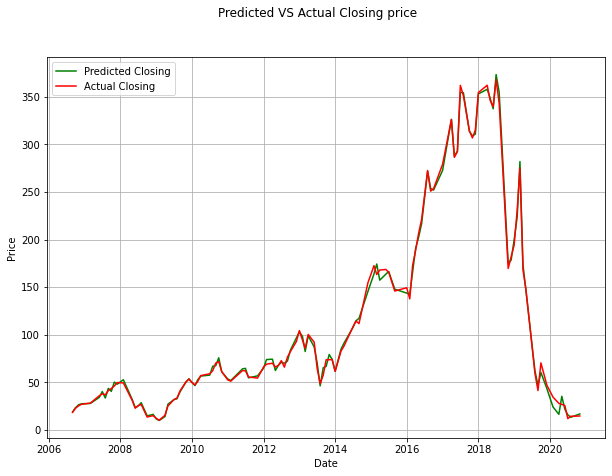

In [36]:
plotter(y=y_train, y_hat= y_pred_train)     #providing the function with data sets

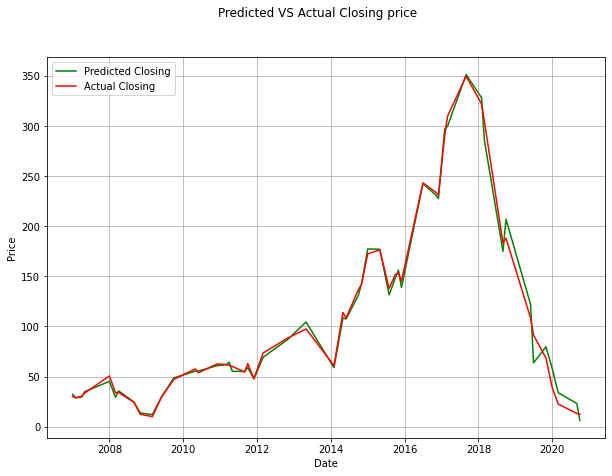

In [37]:
plotter(y_test,y_pred_test)

Hence, from visualizations for both trained data and testing data sets, its clear that linear regression model is successful in predicting the closing price for Yes Bank

# **Ridge and Lasso Regression**

**Ridge Regression**

In [38]:
ridge= Ridge(alpha= 0.1, max_iter=1000)        
ridge.fit(X_train, y_train)     #fitting ridge regression model

Ridge(alpha=0.1, max_iter=1000)

In [39]:
ridge.score(X_train, y_train)   #getting score for the fitted ridge regression model on training data set

0.9972667327549328

In [40]:
ridge.score(X_test, y_test)     #getting score for the ridge model fitted on Testing data set

0.9943926949395641

In [41]:
y_pred_train_ridge= ridge.predict(X_train)      #fetching predicted values for trained data set
y_pred_ridge= ridge.predict(X_test)             #fetching predicted values for test data set

In [42]:
#fetching evaluation metrics scores for ridge regression model
eval_metrics(y= y_test, y_hat= y_pred_ridge)

r2_score is: 0.9944
MSE value is: 46.2026
RMSE value is: 6.7972
MAE value is: 4.3037
MAPE value is: 0.0614


In [43]:
eval_metrics(y_train, y_pred_train_ridge)

r2_score is: 0.9973
MSE value is: 28.4111
RMSE value is: 5.3302
MAE value is: 3.7477
MAPE value is: 0.045


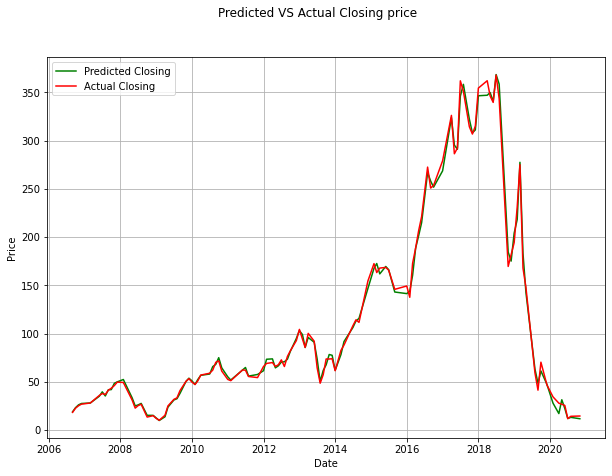

In [44]:
#plotting the predicted values for train data set
plotter(y_train, y_pred_train_ridge)

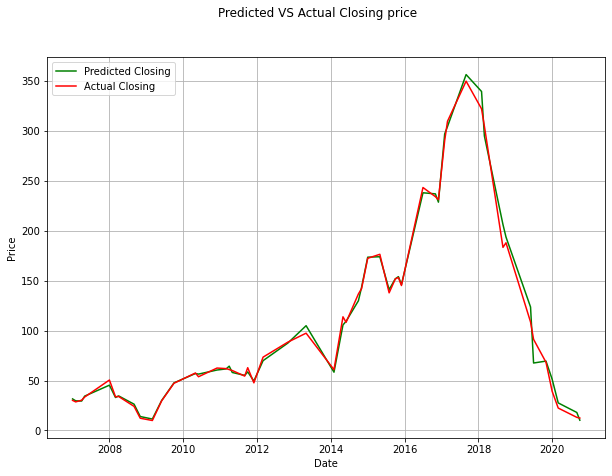

In [45]:
#plotting the predicted values for test data sets
plotter(y= y_test, y_hat= y_pred_ridge)

**Cross Validation of Ridge Regression Model**

Cross validation will be done using GridSearchCV from SciKitLearn Library

In [46]:
parameters= {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge= Ridge()
regression_ridge= GridSearchCV(ridge,param_grid= parameters, scoring= 'neg_mean_squared_error', cv=10)
regression_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [47]:
best_ridge_pred_test= regression_ridge.predict(X_test)      #fetching predicted values for test data set

In [48]:
best_ridge_pred_train= regression_ridge.predict(X_train)    #fetching predicted values for train data set

In [49]:
print("Best value for alpha is: ", regression_ridge.best_params_['alpha'])
print("Best score for the model is:", round(regression_ridge.best_score_,3))

Best value for alpha is:  1e-15
Best score for the model is: -58.929


In [50]:
#Fetching various evaluation metrics scores for test data sets
eval_metrics(y_test, best_ridge_pred_test)

r2_score is: 0.9928
MSE value is: 59.4408
RMSE value is: 7.7098
MAE value is: 5.1616
MAPE value is: 0.0906


In [51]:
eval_metrics(y_train,best_ridge_pred_train )

r2_score is: 0.9983
MSE value is: 18.0613
RMSE value is: 4.2499
MAE value is: 3.1966
MAPE value is: 0.0483


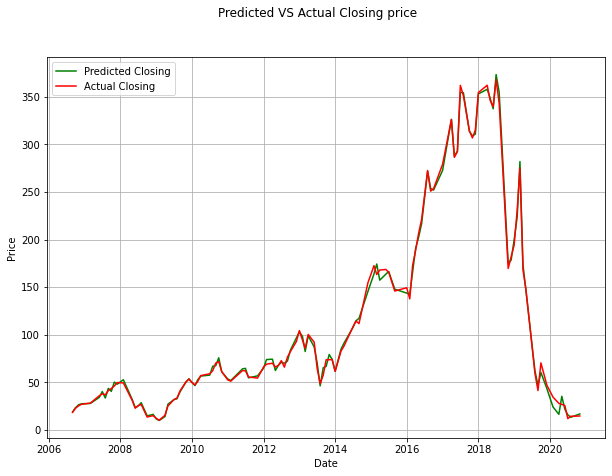

In [52]:
#plotting the predicted values of train data set against actual values in train data set for the best model as per L2 regularization aka Ridge Regression
plotter(y_train, best_ridge_pred_train)

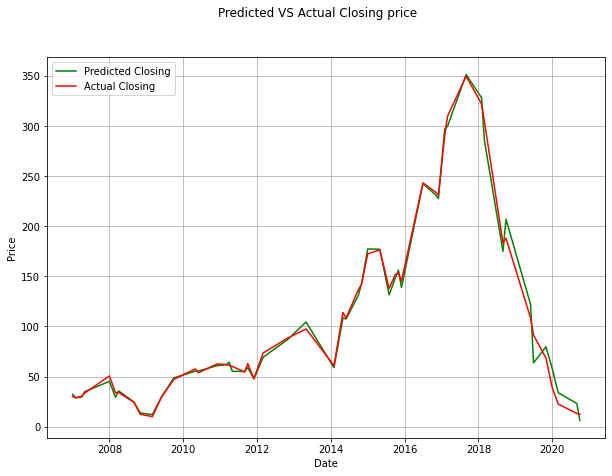

In [53]:
#plotting the predicted values of test data set against actual values in test data set as per L2 regularization aka Ridge Regression
plotter(y_test, best_ridge_pred_test)

**Lasso Regression**

Lasso regression by penalizing parameters of the Regression model using sum of the absolute values of the coefficients

In [54]:
lasso_model = Lasso(alpha= 0.1, max_iter=1000)
lasso_model.fit(X_train,y_train)                  #fitting Lasso Regression Model on Training data sets

Lasso(alpha=0.1)

In [55]:
#fetching the model score on train data set
lasso_model.score(X_train, y_train)

0.9954833564141504

In [56]:
#fetching model score on test data set
lasso_model.score(X_test, y_test)

0.9944232702277216

In [57]:
lasso_train_pred= lasso_model.predict(X_train)      #Predicting values for training data set
lasso_test_pred= lasso_model.predict(X_test)        #Predicting values for test data set

Lasso Regression model has slightly better score for test data set in comparison to Ridge Regression

In [58]:
#Fetching various evaluation metrics scores for the Lasso model on train data
eval_metrics(y_train, lasso_train_pred)

r2_score is: 0.9955
MSE value is: 46.9486
RMSE value is: 6.8519
MAE value is: 4.3502
MAPE value is: 0.0483


In [59]:
#Fetching various evaluation metrics scores for the Lasso model on train data
eval_metrics(y_test, lasso_test_pred)

r2_score is: 0.9944
MSE value is: 45.9507
RMSE value is: 6.7787
MAE value is: 3.9681
MAPE value is: 0.0499


**Implementing 10 fold GridSearchCV Cross Validation for Lasso Regression**

In [60]:
lasso= Lasso()
parameters= {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
regression_lasso= GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv= 10)

In [61]:
regression_lasso.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [62]:
print("Best value for alpha is: ", regression_lasso.best_params_['alpha'])
print("Best score for the model is:", round(regression_lasso.best_score_,3))

Best value for alpha is:  0.001
Best score for the model is: -68.638


In [63]:
best_lasso_pred_train= regression_lasso.predict(X_train)      #Predicting values for training data set after finding the best value of alpha
best_lasso_pred_test= regression_lasso.predict(X_test)        #Predicting values for test data set after finding the best value of alpha

In [64]:
#Fetching various evaluation metrics scores for train data sets
eval_metrics(y_train, best_lasso_pred_train)

r2_score is: 0.9981
MSE value is: 20.2524
RMSE value is: 4.5003
MAE value is: 3.3126
MAPE value is: 0.0427


In [65]:
#Fetching various evaluation metrics scores for test data sets
eval_metrics(y_test, best_lasso_pred_test)

r2_score is: 0.9943
MSE value is: 46.6277
RMSE value is: 6.8284
MAE value is: 4.3868
MAPE value is: 0.0748


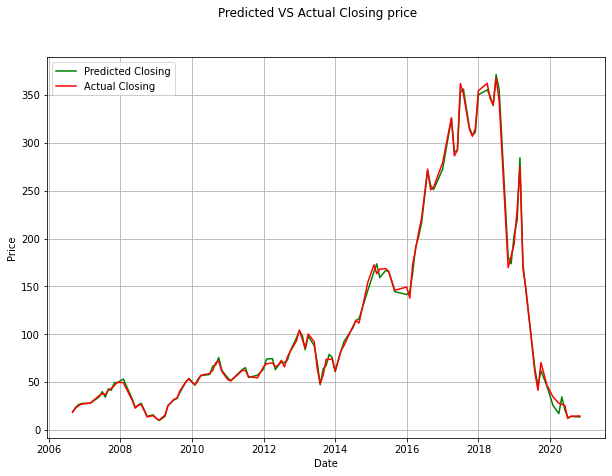

In [66]:
#plotting predicted values of closing price by Lasso Regression model against actual values with respect to train data
plotter(y_train, best_lasso_pred_train)

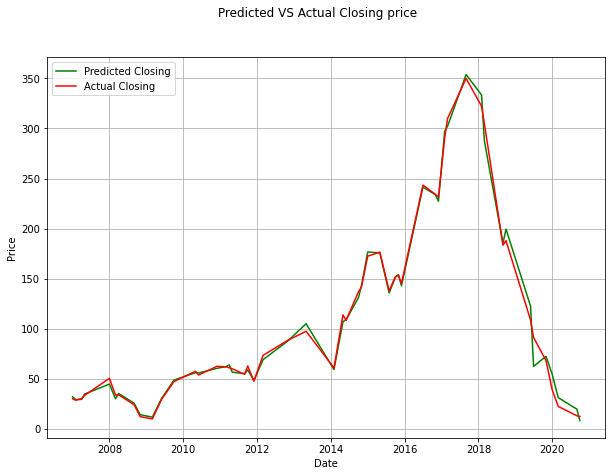

In [67]:
#plotting predicted values of closing price by Lasso Regression model against actual values with respect to test data
plotter(y_test, best_lasso_pred_test)

# **ElasticNet Regression and Cross Validation**

**Elastic Net Regression** model overcomes limitations of Lasso regression by combining both weights used in L1 and L2 regularizations to minimize the loss function thereby achieving better trade off between bias and variance in the model it fits

In [68]:
from sklearn.linear_model import ElasticNet
elastic_model= ElasticNet(alpha=0.1, l1_ratio= 0.5, max_iter=1000)
elastic_model.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [69]:
elastic_model.score(X_train, y_train)

0.9802115821562759

In [70]:
elastic_train_pred= elastic_model.predict(X_train)      #Predicting values for training data set
elastic_test_pred= elastic_model.predict(X_test)        #Predicting values for test data set

In [71]:
#Fetching various evaluation metrics scores for the Elastic Net model on train data
eval_metrics(y_train, elastic_train_pred)

r2_score is: 0.9802
MSE value is: 205.6921
RMSE value is: 14.342
MAE value is: 9.5265
MAPE value is: 0.1152


In [72]:
#Fetching various evaluation metrics scores for the Elastic Net model on test data
eval_metrics(y_test, elastic_test_pred)

r2_score is: 0.9446
MSE value is: 456.8578
RMSE value is: 21.3742
MAE value is: 11.279
MAPE value is: 0.1214


**10 fold GridSearchCV cross validation on Elastic Net regression model**

In [73]:
elastic= ElasticNet()
parameters= {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]}
regression_elastic= GridSearchCV(elastic, parameters, scoring= 'neg_mean_squared_error', cv=10)
regression_elastic.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1, 1.5, 2]},
             scoring='neg_mean_squared_error')

In [74]:
print("Best value for alpha is: ", regression_elastic.best_params_['alpha'])
print("Best value for alpha is: ", regression_elastic.best_params_['l1_ratio'])
print("Best score for the model is:", round(regression_lasso.best_score_,3))

Best value for alpha is:  0.001
Best value for alpha is:  1
Best score for the model is: -68.638


In [75]:
best_elastic_pred_train= regression_elastic.predict(X_train)      #Predicting values for training data set after hyper parameters tuning
best_elastic_pred_test= regression_elastic.predict(X_test)        #Predicting values for test data set after hyper parameters tuning

In [76]:
#Fetching various evaluation metrics scores for train data set
eval_metrics(y_train, best_elastic_pred_train)

r2_score is: 0.9981
MSE value is: 20.2524
RMSE value is: 4.5003
MAE value is: 3.3126
MAPE value is: 0.0427


In [77]:
#Fetching various evaluation metrics scores for test data set
eval_metrics(y_test, best_elastic_pred_test)

r2_score is: 0.9943
MSE value is: 46.6277
RMSE value is: 6.8284
MAE value is: 4.3868
MAPE value is: 0.0748


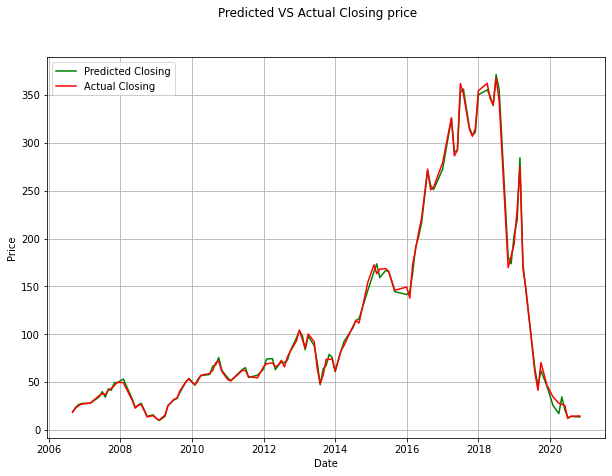

In [78]:
#plotting predicted values of closing price by Elastic Net Regression model against actual values with respect to train data
plotter(y_train, best_elastic_pred_train)

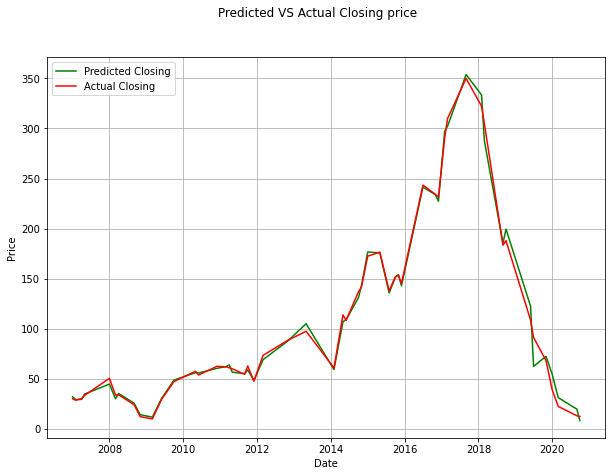

In [79]:
#plotting predicted values of closing price by Elastic Net Regression model against actual values with respect to test data
plotter(y_test, best_elastic_pred_test)

# **XGBoost Model**

In [80]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)

[17:26:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [81]:
xgb.score(X_train,y_train)

0.9997983302971621

In [82]:
xgb_train_pred= xgb.predict(X_train)
xgb_test_pred= xgb.predict(X_test)

In [83]:
eval_metrics(y_train, xgb_train_pred)

r2_score is: 0.9998
MSE value is: 2.0963
RMSE value is: 1.4479
MAE value is: 1.0182
MAPE value is: 0.0173


In [84]:
eval_metrics(y_test, xgb_test_pred)

r2_score is: 0.9675
MSE value is: 267.3973
RMSE value is: 16.3523
MAE value is: 7.8588
MAPE value is: 0.0887


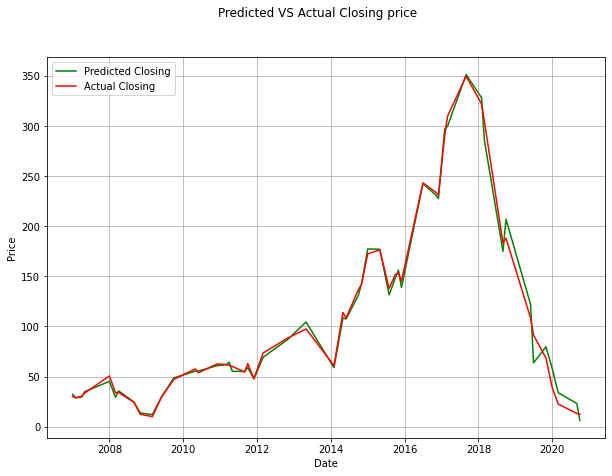

In [85]:
plotter(y_test, y_pred_test)

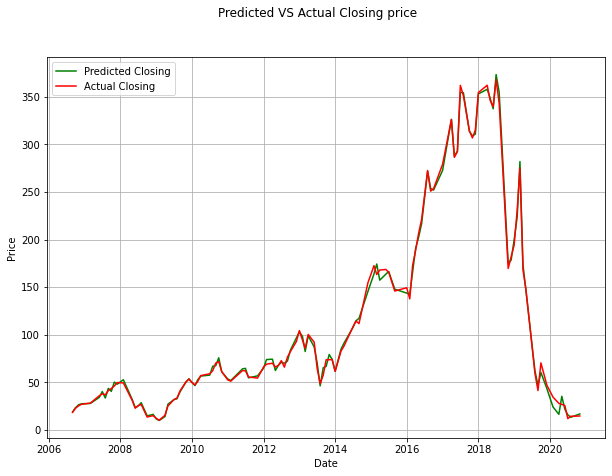

In [86]:
plotter(y_train, y_pred_train)

**implementing 10 fold cross validation of XGBoost model**

In [89]:
parameters= {'n_estimators': [400, 700, 1000],'colsample_bytree': [0.7, 0.8],'max_depth': [15,20,25],'reg_alpha': [1.1, 1.2, 1.3],'reg_lambda': [1.1, 1.2, 1.3],'subsample': [0.7, 0.8, 0.9]}
xgb= XGBRegressor(objective='reg:squarederror')
regression_xgb= GridSearchCV(xgb, parameters, scoring= 'neg_mean_squared_error', cv=10)
regression_xgb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'max_depth': [15, 20, 25],
                         'n_estimators': [400, 700, 1000],
                         'reg_alpha': [1.1, 1.2, 1.3],
                         'reg_lambda': [1.1, 1.2, 1.3],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [91]:
#printing the best parameter values among the list of passed parameters
for key in parameters:
  print(f"The best value of the parameter {key} is:" ,regression_xgb.best_params_[key])

The best value of the parameter n_estimators is: 400
The best value of the parameter colsample_bytree is: 0.8
The best value of the parameter max_depth is: 15
The best value of the parameter reg_alpha is: 1.1
The best value of the parameter reg_lambda is: 1.1
The best value of the parameter subsample is: 0.9


In [93]:
best_xgb_pred_train= regression_xgb.predict(X_train)
best_xgb_pred_test= regression_xgb.predict(X_test)

In [94]:
#fetching various evaluation metrics scores on train data after hyper tuning
eval_metrics(y_train, best_xgb_pred_train)

r2_score is: 1.0
MSE value is: 0.028
RMSE value is: 0.1673
MAE value is: 0.0833
MAPE value is: 0.0015


In [96]:
#fetching various evaluation metrics scores on test data after hyper tuning
eval_metrics(y_test, best_xgb_pred_test)

r2_score is: 0.9516
MSE value is: 398.5296
RMSE value is: 19.9632
MAE value is: 10.2767
MAPE value is: 0.1044


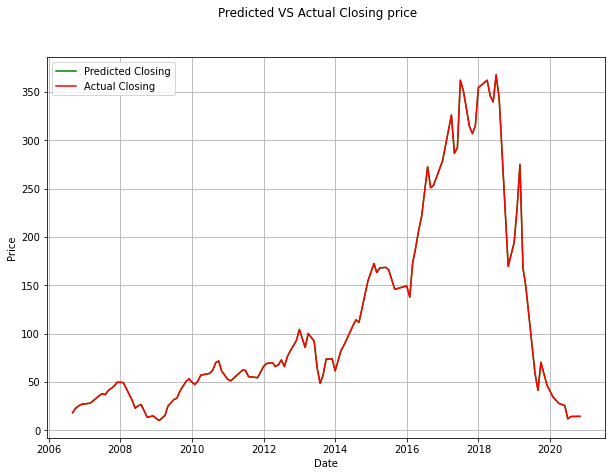

In [97]:
#plotting predicted values of closing price by XGB Regression model against actual values with respect to train data
plotter(y_train, best_xgb_pred_train)

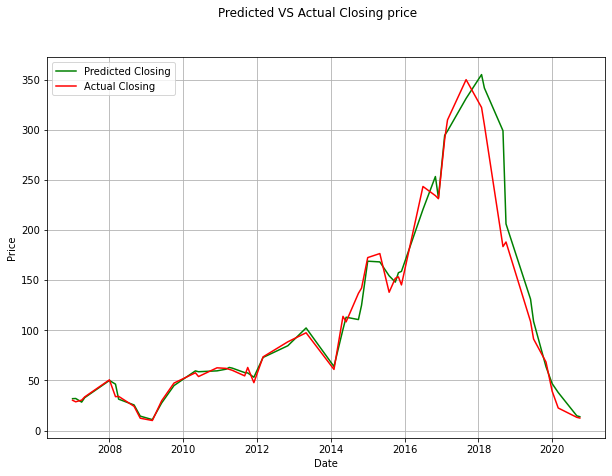

In [98]:
#plotting predicted values of closing price by XGB Regression model against actual values with respect to test data
plotter(y_test, best_xgb_pred_test)

## **Summary and Conclusion**


*   With the given data at hand, an inspection of the same has been carried out visually and desciptively for checking abnormalities in the data set
*   Average price of the Open, High, Low and Close were considered for calculation to eliminate multicollinearity
*   Further, Lags were introduced into the data set thereby essentially considering happenings of previous 14 sessions in the market and further eliminating multicollinearity
*   Simple Linear Regression model, Ridge and Lasso Regression models, XGBoost regression model were built based on training data set from the original data set and predictions were made with aforementioned evaltion metrics scores
*   Hyperparameter tuning and 10 fold cross validation was performed on each regression model for optimizing loss function thereby successfully predicting closing prices for test data sets







